Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

### A. Purpose

#### A1. Research Question

Can we forecast future revenue based on the patterns of current earning?

#### A2. Analysis Goal

The goal of this analysis is to forecast future revenue by identifying potential patterns in the current revenue. This information can provide the company with insights on what to do when these patterns occur. For example, a revenue uptrend in a particular month can be a good indicator to increase cross-selling and product advertisements. If a downtrend is forecasted, the company can scale back spendings to save money.

### B. Method Justification

#### B1. Assumptions

The first assumption of time series analysis is that the data is stationary. When a time series is stationary, its mean, variance, and autocorrelations of the observations do not vary over time (Reider, 2022). If a process is not stationary, then it becomes difficult to model. If the parameters are different at each point in time, then the model cannot estimate accurately.

The second assumption is that there is no autocorrelation in the residuals. Autocorrelation is the similarity between a time series and a lagged version of itself over time. If the residuals are autocorrelated, regression models can overfit the data and lead to bias results (Dotis-Georgiou, 2019). We want the residuals to be independent and not autocorrelated so the model is a good fit to the data.

### C. Data Preparation

#### C1. Time Series Visualization

##### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

##### Import dataset

In [2]:
df = pd.read_csv('teleco_time_series.csv')

##### Create line graph

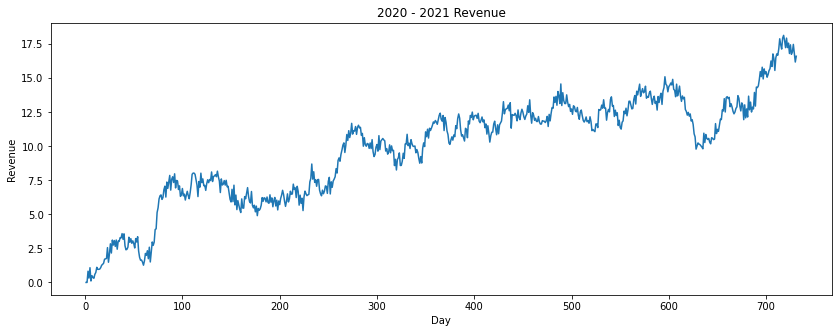

In [3]:
fig = plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='Day', y='Revenue')
plt.title('2020 - 2021 Revenue')
plt.show()

#### C2. Time Step Formatting

##### Check for missing and duplicate data

In [4]:
# Check for missing values
df.isnull().values.any()

False

In [5]:
# Check for duplicates
df.duplicated().any()

False

##### Format Description

The time steps formatting of the visualization is in days. The length of the sequence is 731 days, which is two years of revenue data. There was no missing or duplicated data in the time series. The line graph shows a continuous line without any break, indicating there were no gaps in measurement. This data is clean and complete.

#### C3. Evaluate Stationarity

##### Perform Augmented Dickey-Fuller Test

In [6]:
# Run test on revenue
results = adfuller(df['Revenue'])

# Display test results
print(f'ADF statistic: {results[0]:.2f}')
print(f'p-value: {results[1]:.2f}')
print('Critical values:')
for crit, val in results[4].items():
    print(f'  {crit}: {val:.2f}')

ADF statistic: -1.92
p-value: 0.32
Critical values:
  1%: -3.44
  5%: -2.87
  10%: -2.57


##### Evaluation

The results from the Augmented Dickey-Fuller test indicates that our revenue time series is not stationary. The ADF statistic is -1.92, which was greater than all three critical values at 1%, 5%, and 10%. The p-value is 0.32, which was significantly greater than 0.05 needed to reject the null hypothesis. Based on the ADF statistic and the p-value, we failed to reject the null hypothesis that the process is not stationary (Reider, 2022).

We will need to difference the time series to remove the non-stationarity before the analysis.

#### C4. Steps of Preparation

1. Convert `Day` column to `datetime` format.
2. Difference time series to remove non-stationarity.
3. Split data into 80% training set and 20% test set.

##### 1. Convert to datetime

In [7]:
# Convert Day to datetime
df['Date'] = pd.date_range(start=datetime(2020, 1, 1), periods=df.shape[0], freq='D')

# Set date as index 
df.set_index('Date', inplace=True)

# Drop day column
df.drop('Day', axis=1, inplace=True)

df

,Revenue
Date,
2020-01-01,0.000000
2020-01-02,0.000793
2020-01-03,0.825542
2020-01-04,0.320332
2020-01-05,1.082554
...,...
2021-12-27,16.931559
2021-12-28,17.490666
2021-12-29,16.803638


##### 2. Differencing the Time Series

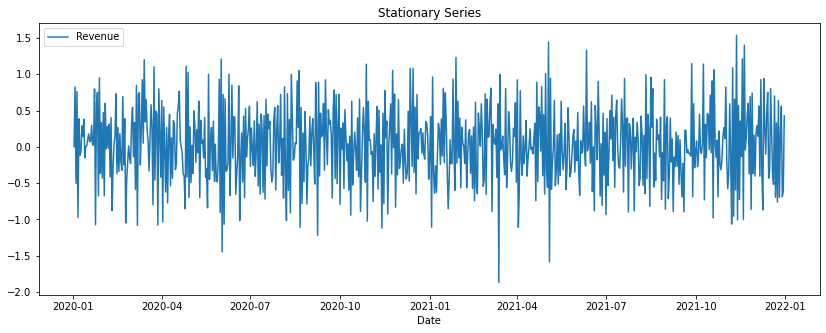

In [8]:
# Differencing to make data stationary
diff_df = df.diff().dropna()

# Confirm with line plot
fig = plt.figure(figsize=(14, 5))
sns.lineplot(data=diff_df)
plt.title('Stationary Series')
plt.show()

##### 3. Split Data

In [9]:
# 80% train set is 585 days, 20% test set is 146 days
train = df.iloc[:585]
test = df.iloc[585:]

#### C5. Copy of Cleaned Dataset

In [10]:
# Export cleaned data with training and testing set
df.to_csv('teleco_clean.csv')
train.to_csv('train_set.csv')
test.to_csv('test_set.csv')

### D. Time Series Analysis

#### D1. Annotated Report

##### Decomposed Time Series

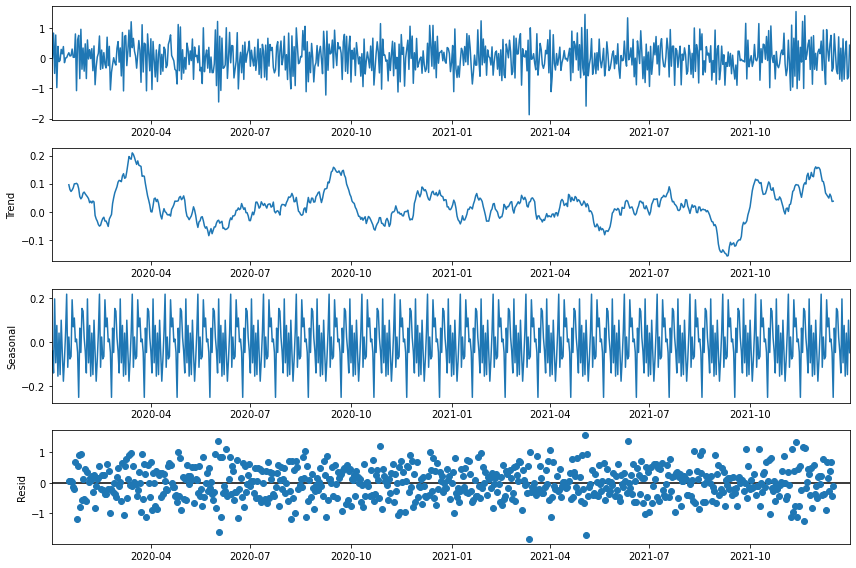

In [11]:
# Generate a decomposed time series
decomp = seasonal_decompose(diff_df, period=30)

fig = decomp.plot()
fig.set_size_inches((12, 8))
plt.tight_layout()
plt.show()

##### Seasonality, Trends, and Residuals

The decomposed time series showed a lack of seasonality and trends in the time series. Seasonality is a cyclical component of non-stationary data. Since we have already removed non-stationarity using the differencing procedure, we have also removed seasonality from the data. This applies to the trend graph as the process appears to follow a random walk with no clear pattern. The residuals also confirm the lack of trends in the data because it also does not contain any patterns. 

##### Autocorrelation Function

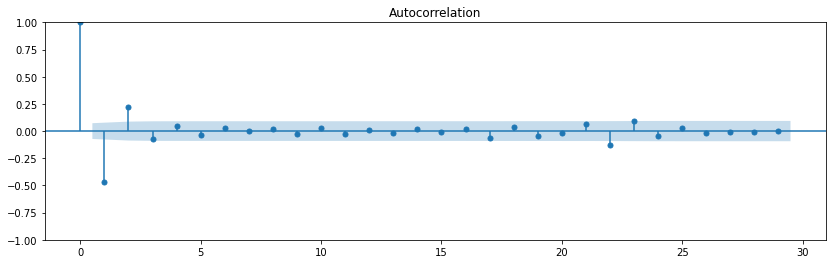

In [12]:
# Plot autocorrelation function (ACF)
fig = plot_acf(diff_df['Revenue'])
fig.set_size_inches((14, 4))
plt.show()

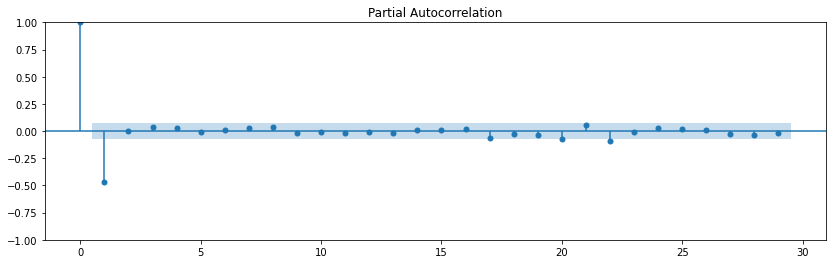

In [13]:
# Plot partial autocorrelation function (PACF)
fig = plot_pacf(diff_df['Revenue'], method='ywm')
fig.set_size_inches((14, 4))
plt.show()

The autocorrelation function (ACF) shows how the data correlate to a lagged version of itself over time. The partial autocorrelation function (PACF) is similar to ACF, but it finds the correlation of the residuals instead. For both ACF and PACF, a positive value indicates a positive correlation and a negative value indicates the data is not correlated (Reider, 2022). In our graphs, we saw that the values approached zero very quickly, which is normal for stationary data. Since the values are small and stay inside the confidence interval, the blue shaded region, they are not statistically significant.

##### Spectral Density

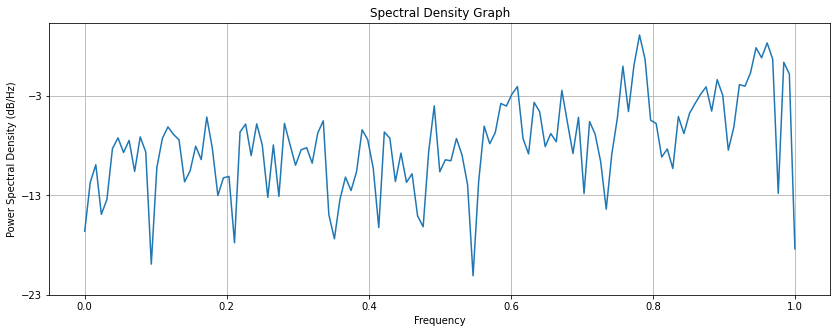

In [14]:
# Plot spectral density
fig = plt.figure(figsize=(14, 5))
plt.psd(diff_df['Revenue'])
plt.title('Spectral Density Graph')
plt.show()

The spectral density graph is used to discover periodicities. We use this graph because plotting just the time series by itself may not provide enough details to find these periodic behaviors. In our spectral density graph, we do not identify hidden periodicities since we have already performed differencing on the time series.

#### D2. Identifying Model

To identify the best model that fit the data, we can fit multiple models using `auto_arima()`. Each time the process fit a model, it automatically adjusts the parameters according to our arguments. The metric we can use to measure goodness-of-fit is the Akaike Information Criterion (AIC). This metric imposes a penalty based on the number of parameters used (Reider, 2022). Our task then is to find an optimal model with the lowest AIC score.

We will be using the non-differenced original time series to fit our models. to account for the seasonality aspect of the data, the following additional arguments will also be used for seasonality (Smith, 2022):

- `start_P`: the order of the auto-regressive portion of the seasonal model.
- `D`: the order of the seasonal differencing.
- `start_Q`: the order of the moving-average portion of the seasonal model
- `m`: the period for seasonal differencing.

In [15]:
# Adapted from pmdarima API reference (Smith, 2022)
# https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

# Run auto_arima on train set with seasonal arguments to find the best model
auto_model = auto_arima(train, start_p=1, d=1, start_q=1, start_P=1, D=1, start_Q=1, m=30, error_action='ignore', seasonal=True, trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[30]             : AIC=inf, Time=10.79 sec
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=1271.575, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=988.939, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=6.77 sec
 ARIMA(1,1,0)(0,1,0)[30]             : AIC=1142.370, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[30]             : AIC=898.443, Time=3.40 sec
 ARIMA(1,1,0)(2,1,1)[30]             : AIC=inf, Time=26.86 sec
 ARIMA(1,1,0)(1,1,1)[30]             : AIC=inf, Time=9.06 sec
 ARIMA(0,1,0)(2,1,0)[30]             : AIC=1052.910, Time=2.26 sec
 ARIMA(2,1,0)(2,1,0)[30]             : AIC=900.262, Time=4.67 sec
 ARIMA(1,1,1)(2,1,0)[30]             : AIC=900.306, Time=5.49 sec
 ARIMA(0,1,1)(2,1,0)[30]             : AIC=931.550, Time=4.12 sec
 ARIMA(2,1,1)(2,1,0)[30]             : AIC=901.755, Time=12.27 sec
 ARIMA(1,1,0)(2,1,0)[30] intercept   : AIC=900.256, Time=16.15 sec

Best model:  ARIMA(1,1,0)(2,1,0)[30]     

In [16]:
# Train set index frequency
train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq)

# Build ARIMA model based on auto_arima result
model = ARIMA(train, order=(1, 1, 0), seasonal_order=(2, 1, 0, 30))
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                          Revenue   No. Observations:                  585
Model:             ARIMA(1, 1, 0)x(2, 1, 0, 30)   Log Likelihood                -445.222
Date:                          Sat, 13 Aug 2022   AIC                            898.443
Time:                                  15:29:23   BIC                            915.712
Sample:                              01-01-2020   HQIC                           905.189
                                   - 08-07-2021                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4975      0.037    -13.290      0.000      -0.571      -0.424
ar.S.L30      -0.7178      0.042    -17.200      0.000      -0.800      -0.636
ar.S.L60      -0.4153      0.039    -10.662      0.000      -0.492      -0.339
sigma2         0.2815      0.016     17.165      0.000       0.249       0.314
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.80   Prob(JB):                         0.63
Heteroskedasticity (H):               0.98   Skew:                            -0.03
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### D3. Forecasting

##### ARIMA Derived Forecast

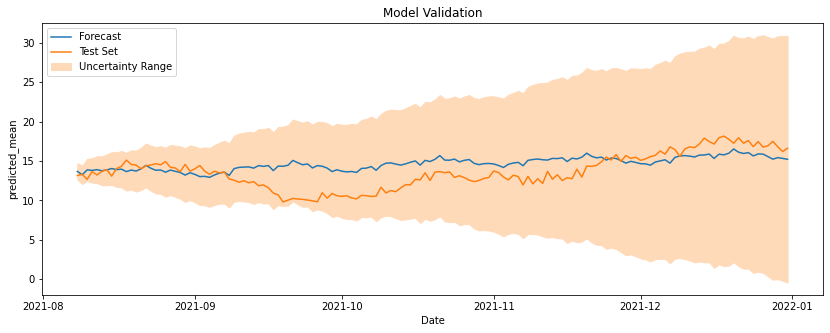

In [17]:
# Forecast against the test set to validate
forecast = result.get_forecast(steps=146, dynamic=True)
forecast_mean = forecast.predicted_mean

# Get confidence intervals of forecast
conf_int = forecast.conf_int()
lower_lim = conf_int.loc[:, 'lower Revenue']
upper_lim = conf_int.loc[:, 'upper Revenue']
                         
# Plot forecast against test set
fig = plt.figure(figsize=(14, 5))
sns.lineplot(data=forecast_mean, label='Forecast')
sns.lineplot(data=test['Revenue'], label='Test Set')
plt.fill_between(lower_lim.index, lower_lim, upper_lim, color='peachpuff', label='Uncertainty Range')
plt.title('Model Validation')
plt.legend(loc='upper left')
plt.show()

#### D4. Output and Calculations

All the output and calculation for the analysis could be found in section D1 to D3.

#### D5. Implementation Code

The implementation code for the time series model could be found in section D1 to D3.

### E. Findings Summary

#### E1. Analysis Results

##### ARIMA Model Selection

To identify a good ARIMA model, we used `auto_arima()` to search for the model with the lowest AIC score. A low AIC score suggests that the model is good at predicting out-of-sample values (Fulton, 2022). The best model returned was ARIMA(1, 1, 0)x(2, 1, 0, 30) with an AIC score of 898.443. The effect of seasonality was accounted for using the appropriate arguments when fitting the ARIMA model. 

##### Prediction Interval and Forecast Length

The selected prediction interval of the model is daily for consistency with the interval of the original time series. The selected forecast length was 146 days, same as the 20% test set, to be used for model validation.

##### Model Evaluation

In the validation graph, the mean prediction is the blue line while the uncertainty range is shaded with light orange. The uncertainty range include the upper and lower limit of the random shocks we cannot predict. Since we cannot predict the shock term at each prediction interval, the uncertainty range will grow very quickly proportionally with the forecast period (Fulton, 2022). Our uncertainty range is very large, which indicates that our model will not perform well with long forecast periods.

To evaluate how well the model used the training data, we can plot the diagnostic graphs:

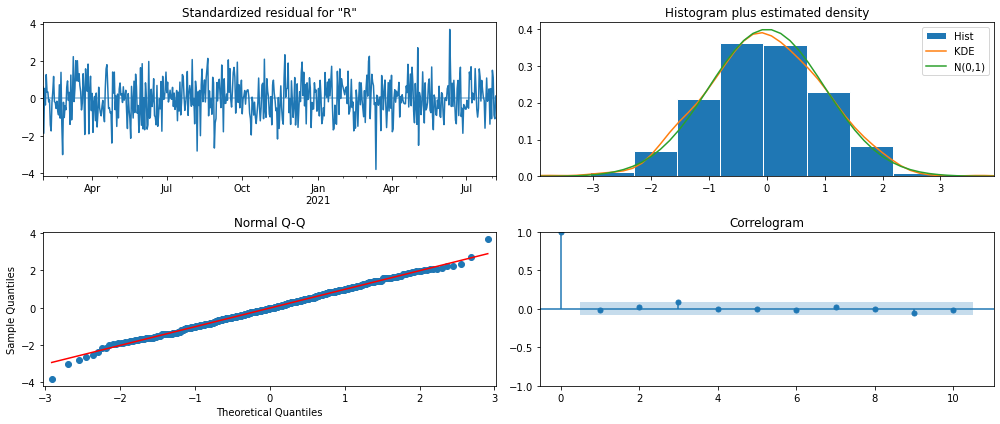

In [18]:
fig = result.plot_diagnostics()
fig.set_size_inches((14, 6))
plt.tight_layout()
plt.show()

The four diagnostic plots tell us particular information about our model (Fulton, 2022):

1. In the standardized residual plot, there is no obvious patterns in the residuals. This demonstrated that our ARIMA model fitted the data with the appropriate seasonal differencing.
2. In the histogram and KDE plot, the distribution of our residuals is approximately normal. This confirms that our residuals do not contain patterns or outliers.
3. The Q-Q plot showed that the residuals or the model is normally distributed.b
4. The correlogram is the ACF plot for the residuals. It indicated that 95% of the correlations for lag greater than zero are not be significant. This means our model was able to capture all of the information from the time series.

The two other error metrics we can use are the RMSE and MAE:

In [19]:
# Adapted from How to Build ARIMA Model (ProjectPro, 2022)
# https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

# Assign prediction and actual values to series
predictions = forecast_mean
targets = pd.Series(test['Revenue'])

# RMSE and MAE
rmse = np.mean((predictions - targets)**2)**0.5
mae = np.mean(np.abs(predictions - targets))
print('Error Metrics:')
print(f'- RMSE: {rmse}\n- MAE: {mae}')

Error Metrics:
- RMSE: 2.135550617749771
- MAE: 1.7643146850871894


Both are the RMSE and MAE are relatively large in comparison to the model predicted mean of 15. In percentage term, the RMSE and MAE are 14.2% and 11.7% of the predicted mean. These errors will also become less reliable when forecasting longer periods since longer prediction interval means the model becomes less accurate with more out-of-sample predictions.

#### E2. Annotated Visualization

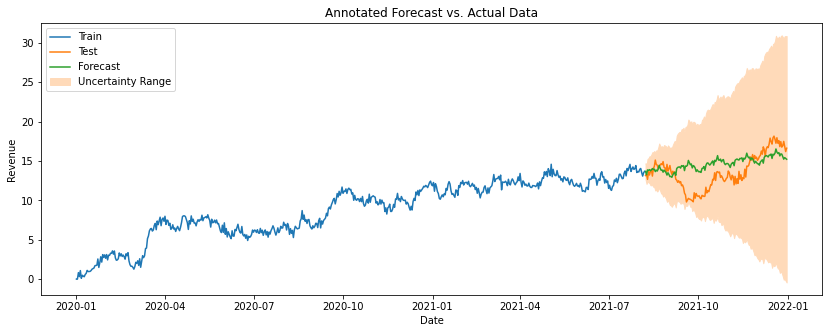

In [20]:
# Plot forecast with annotation
fig = plt.figure(figsize=(14, 5))
sns.lineplot(data=train['Revenue'], label='Train')
sns.lineplot(data=test['Revenue'], label='Test')
sns.lineplot(data=forecast_mean, label='Forecast')
plt.fill_between(lower_lim.index, lower_lim, upper_lim, color='peachpuff', label='Uncertainty Range')
plt.title('Annotated Forecast vs. Actual Data')
plt.legend(loc='upper left')
plt.show()

#### E3. Recommendation

Based on the performance of the model against the test set, we would advise against using this model for long term forecast. The biggest issue is that the errors of the model grow very large when it attempts to forecast long term revenue. While this model could potentially be used for short term prediction, the result needs to be carefully analyzed. This is because we can only forecast the general direction of the trend and not how revenue actually moves. To improve the performance, we suggest adding more training and testing data to the model.

### G. Third-Party Code

ProjectPro. (2022, June 8). How to Build ARIMA Model in Python for time series forecasting? Retrieved August 6, 2022, from https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

Smith, T. (2022). pmdarima API Reference. Pmdarima Documentation. Retrieved August 5, 2022, from https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

### H. References

Dotis-Georgiou, A. (2019, May 2). Autocorrelation in Time Series Data. InfluxData. Retrieved August 4, 2022, from https://www.influxdata.com/blog/autocorrelation-in-time-series-data/

Fulton, J. (2022). ARIMA Models in Python. DataCamp. Retrieved August 12, 2022, from https://app.datacamp.com/learn/courses/arima-models-in-python

Reider, R. (2022). Time Series Analysis in Python. DataCamp. Retrieved August 4, 2022, from https://app.datacamp.com/learn/courses/time-series-analysis-in-python

Singh, A. (2022, June 20). Build High Performance Time Series Models using Auto ARIMA in Python and R. Analytics Vidhya. Retrieved August 6, 2022, from https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/